#### **This NoteBook is for testing the localSearch Algorithm and generating the averge cost and runtime for the each different input data file**

In [24]:
import pandas as pd
import os
%load_ext autoreload
%autoreload 2
from LocalSearchAlg.dataLoader import DataLoader
from LocalSearchAlg.localSearch import LocalSearch
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
path = "DATA/Denver.tsp"
data = DataLoader(path)
solver  = LocalSearch(data)
solver.solve(seed=452,
             time_limit=10,
             history=True)
run_time,cost_list = solver.show_hist()

Text(0.5, 1.0, 'LS Alg on Denver Data')

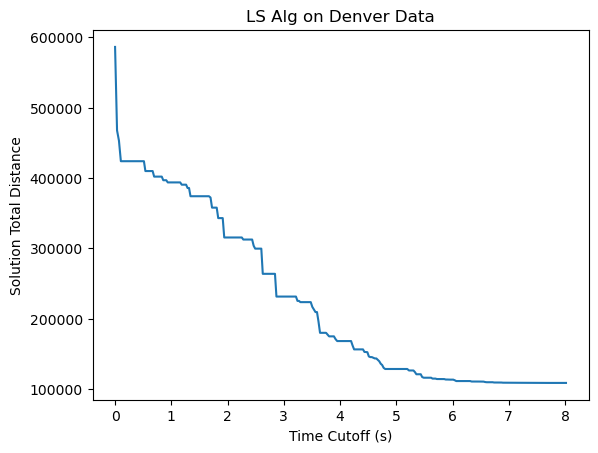

In [28]:
plt.plot(run_time,cost_list)
plt.xlabel("Time Cutoff (s)")
plt.ylabel("Solution Total Distance")
plt.title("LS Alg on Denver Data")

In [84]:
path = "DATA/Berlin.tsp"
data = DataLoader(path)
solver  = LocalSearch(data)
solver.solve(temp=1.,
             decay=1e-10,
             seed=4,
             decay_cycle=50,
             maxiter=1e15,
             const_k=1e4,
             max_stable_iter=1e5)

(array([45, 34, 42,  5,  9,  8, 48, 40, 41,  6, 24,  3, 49,  2,  7, 47, 30,
        35, 11, 15, 43, 46, 13, 26,  4, 50, 36, 14, 37, 51,  0, 28, 39, 19,
        21, 22, 29, 20, 16, 44, 18, 23, 31, 17,  1, 32, 38, 33, 25, 12, 10,
        27]),
 22052.10140994649,
 4.923998594284058)

In [7]:
path = "DATA/Denver.tsp"
data = DataLoader(path)
solver  = LocalSearch(data)
solver.solve(temp=2,
             decay=1e-3,
             decay_cycle=50,
             maxiter=1e15,
             const_k=1e4,
             max_stable_iter=2e4)


(array([19, 50, 27, 52, 16, 81, 39, 54, 75, 65, 53, 25, 45, 35, 18, 32, 57,
        12, 62, 28, 63, 21, 66, 69, 61, 36,  9, 23, 34,  4,  7, 60, 29, 44,
        78, 58, 26, 24, 10, 77,  2, 68, 64, 47, 74, 70, 72,  5, 48, 46, 42,
        11, 55, 82, 37, 56, 80, 22,  6,  8, 40, 38, 41, 73, 13, 79, 20, 76,
         0, 49, 17, 30,  3, 43, 31, 51, 59, 33, 15, 71, 67,  1, 14]),
 408597.8110119239,
 0.7580006122589111)

In [21]:
path = "DATA/"
file_list = []
for dir,_,files in os.walk(path):
    file_list.extend([os.path.join(dir,file) for file in files if file[0]!='.'])
    
city_list = []
delt_time_list = []
sol_cost_list = []

max_loop = 20

for file in file_list:
    data = DataLoader(file)
    solver = LocalSearch(data)
    city = file.split('/')[-1]
    for _ in range(max_loop):
        _,sol_cost,delt_time = solver.solve(temp=2,
                                            decay=0.02,
                                            decay_cycle=20,
                                            maxiter=1e15,
                                            const_k=1e4,
                                            max_stable_iter=2e4)
        city_list.append(city)
        delt_time_list.append(delt_time)
        sol_cost_list.append(sol_cost)
df_data = {"Dataset":city_list, "Time(s)":delt_time_list, "sol.Quality": sol_cost_list}
df = pd.DataFrame(df_data)

In [23]:
group = df.groupby('Dataset')
avg_df = group.mean()
avg_df["Full_Tour"] = "Yes"
avg_df

,Time(s),sol.Quality,Full_Tour
Dataset,,,
Atlanta.tsp,0.601682,2.209510e+06,Yes
Berlin.tsp,0.940837,9.747713e+03,Yes
Boston.tsp,0.710700,1.058970e+06,Yes
Champaign.tsp,0.932246,6.728683e+04,Yes
Cincinnati.tsp,0.592700,2.785501e+05,Yes
Denver.tsp,1.405000,1.500495e+05,Yes
NYC.tsp,1.141750,2.255821e+06,Yes
Philadelphia.tsp,0.664800,1.653512e+06,Yes
Roanoke.tsp,9.797318,1.484687e+06,Yes


In [17]:
avg_df.to_csv("LocalSearchAlg/LS_results.csv",index=True)